In [18]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
pnames = ['509', '493', '489', '487']
quarters = ['q1', 'q2', 'q3', 'q4']
epochs = ['E1', 'E2', 'E3', 'E4']

In [3]:
stds = np.zeros((4,4,2))
for j, p in enumerate(pnames):
    for i, q in enumerate(quarters):
        stds[j, i] = np.load('epoch_stats/' + 'X_' + q + '_std_' + p + '.npy')

In [25]:
np.savetxt('supplementary_fig_data/raw_stds.csv', stds[:, 0], delimiter=',')
np.savetxt('supplementary_fig_data/filt_stds.csv', stds[:, 1], delimiter=',')

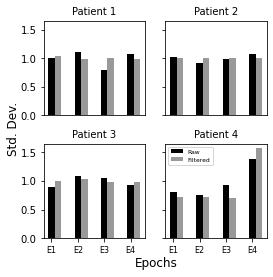

In [50]:
fig, ax = plt.subplots(2,2,figsize=(4,4), sharey=True)
plt.subplots_adjust(hspace = .3)
k = 0
for i in range(2):
    for j in range(2):
        ax[i,j].set_title('Patient ' + str(k+1),fontsize=10)
        ax[i, j].bar(np.arange(4), stds[k, :, 0], width=.25, label='Raw', color=(0,0,0))
        ax[i, j].bar(np.arange(4)+.25, stds[k, :, 1], width=.25, label='Filtered', color=(.6,.6,.6))
        ax[i,j].set_xticks(np.arange(4))
        if i==1:
            ax[i,j].set_xticklabels(epochs, fontsize=8)
        else:
            ax[i,j].set_xticks([])
            
        ax[i,j].set_yticks(np.arange(0,1.6,.5))
        
        #if j==1:
        #    ax[i,j].set_yticklabels([])
            
            
        k += 1
plt.text(-1.45,-.5, "Epochs", fontsize=12)
plt.text(-6.3, 1.5, "Std. Dev.", fontsize=12, rotation=90)
plt.legend(prop={'size': 6})
        
plt.savefig('Consistency_Figures/std_dev_epochs', bbox_inches='tight', dpi=400)

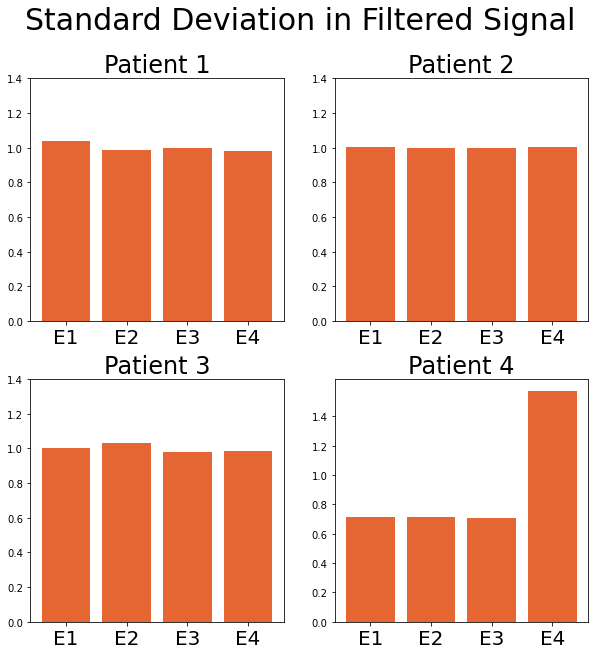

In [11]:
fig, ax = plt.subplots(2,2,figsize=(10,10))
plt.subplots_adjust(hspace = .24)
plt.suptitle("Standard Deviation in Filtered Signal", fontsize=30)
k = 0
for i in range(2):
    for j in range(2):
        ax[i,j].set_title('Patient ' + str(k+1),fontsize=24)
        ax[i, j].bar(np.arange(4), stds[k, :, 1], color=(.9,.4,.2))
        ax[i,j].set_xticks(np.arange(4))
        ax[i,j].set_xticklabels(epochs, fontsize=20)
        ax[i,j].set_yticks(np.arange(0,1.5,.2))
        k += 1
        
plt.savefig('Consistency_Figures/std_dev_filtered', bbox_inches='tight', dpi=400)